###  EM for 1D Mixture of Gaussians 

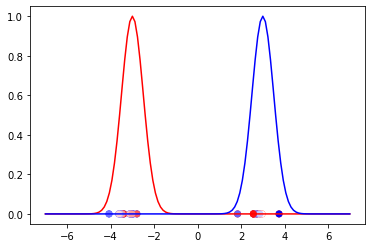

In [165]:
from matplotlib import pyplot as mp
import numpy as np

SIGMA = .5 
mus = [-3, 3]

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(-7, 7, 120)

points = []

Ns = (10, 10)
N = Ns[0] + Ns[1]

RED = "#FF0000"
BLUE = "#0000FF"

colors = [RED, BLUE]

oracle_color = []

for mno, mu in enumerate(mus):
    mp.plot(x_values, gaussian(x_values, mu, sig=SIGMA), color=colors[mno])
    draw = np.random.normal(mu, SIGMA, Ns[mno])
    points = points + list(draw)
    oracle_color = oracle_color + [mno for o in range(Ns[mno])] 
    
y_axis = [0 for o in range(len(points))]

ys = [1 for i in range(Ns[0])] + [0 for i in range(Ns[1])]

points = np.asarray(points)

# show the oracle colors 
mp.scatter(points, y_axis, c = np.array(oracle_color), cmap=mp.cm.bwr)

# E[X=y1]
expected_values = np.random.rand(N)

# show the guesses colors 
mp.scatter(points, y_axis, c = expected_values, cmap=mp.cm.bwr)

mp.show()

theta = {"m1": -1, "m2": 1}

In [166]:
# https://stackoverflow.com/questions/12412895/how-to-calculate-probability-in-a-normal-distribution-given-mean-standard-devi
# avoid dependency => scipy.stats import norm

import math

def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

def estep(points, theta, expected_values):
    for pointno, point in enumerate(points):
        p1 = normpdf(point, theta["m1"], sd=SIGMA)
        p2 = normpdf(point, theta["m2"], sd=SIGMA)
        expected_values[pointno] = p1/(p1 + p2)
    return expected_values
      
def mstep(expected_values, observations):
    def getMean(expected_values, observations):
        return np.sum(expected_values * observations)/np.sum(expected_values)

    m1 = getMean(expected_values=expected_values, observations=points)
    m2 = getMean(expected_values=(1 - expected_values), observations=(points))
    print(m1, m2)
    
    return {"m1": m1, "m2": m2, "pi": np.sum(expected_values)}

for i in range(100):
    expected_values = estep(points, theta, expected_values)
    theta = mstep(expected_values, observations=points)
    #print(theta["m1"], expected_values)

-3.3121672243593823 2.7166950345923317
-3.3121672243593823 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 3.10248900e-10 9.62402367e-14
 6.32777377e-10 1.20631392e-09 4.03342299e-07 1.17588918e-09
 5.09140767e-11 5.33852232e-10 1.14992719e-10 1.21227286e-09]
-3.312167435272586 2.71669499936944
-3.312167435272586 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.65830269e-32 4.40528079e-43
 1.42151978e-31 9.94088007e-31 4.04103768e-23 9.20413335e-31
 7.14035943e-35 8.51525804e-32 8.32383941e-34 1.00896439e-30]
-3.312167435272586 2.71669499936944
-3.312167435272586 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.65829423e-32 4.40525519e-43
 1.42151261e-31 9.94083055e-31 4.041

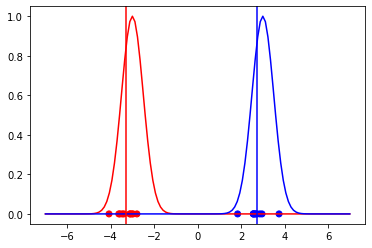

In [167]:
for mno, mu in enumerate(mus):
    mp.plot(x_values, gaussian(x_values, mu, sig=SIGMA), color=colors[mno])

plt.axline((theta["m1"], 0), (theta["m1"], 1), color="red")
plt.axline((theta["m2"], 0), (theta["m2"], 1), color="blue")
    
# show the guesses colors 
mp.scatter(points, y_axis, c = expected_values, cmap=mp.cm.bwr)

### Things you could add 

- A pi parameter

- A gif of the algorithm training